In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
data_train = pd.read_csv ('train.csv')

In [ ]:
data_test = pd.read_csv ('test.csv')

In [ ]:
data_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
data_train = data_train.fillna(0)
data_test = data_test.fillna(0)

In [ ]:
data_train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,0,IR1,Lvl,AllPub,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,0,IR1,Lvl,AllPub,...,0,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,0,IR1,Lvl,AllPub,...,0,0,0,0,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,0,IR1,Lvl,AllPub,...,0,0,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,0,8,2007,WD,Normal,307000
7,8,60,RL,0.0,10382,Pave,0,IR1,Lvl,AllPub,...,0,0,0,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,0,1,2008,WD,Normal,118000


In [ ]:
X_train = np.array(data_train[['YearBuilt', 'OverallQual' ,'GarageCars' , '1stFlrSF', 'PoolArea', 'TotRmsAbvGrd', 'OverallCond']][:1100])
Y_train = np.array(data_train['SalePrice'][:1100])
X_train.shape
Y_train = Y_train.reshape(-1,1)
Y_train.shape
X_test =  np.array(data_train[['YearBuilt', 'OverallQual' ,'GarageCars' , '1stFlrSF', 'PoolArea', 'TotRmsAbvGrd', 'OverallCond']][360:])
Y_test = np.array(data_train['SalePrice'][360:])
Y_test = Y_test.reshape(-1,1)
Y_test

array([[156000],
       [145000],
       [198500],
       ...,
       [266500],
       [142125],
       [147500]])

In [58]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(7 , activation = "relu"),
    tf.keras.layers.Dense(100 , activation = "relu"),
    tf.keras.layers.Dense(500 , activation = "relu"),
    tf.keras.layers.Dense(100 , activation = "relu"),
    tf.keras.layers.Dense(10 , activation = "relu"),
    tf.keras.layers.Dense(1, activation = "linear")])

In [59]:
model.compile(optimizer = tf.keras.optimizers.Adam (learning_rate = 0.01 ),
              loss = tf.keras.losses.MeanAbsoluteError())

In [60]:
history = model.fit(X_train , Y_train, epochs = 300)

Epoch 1/300
35/35 [==============================] - 1s 3ms/step - loss: 80454.3125
Epoch 2/300
35/35 [==============================] - 0s 4ms/step - loss: 48500.3438
Epoch 3/300
35/35 [==============================] - 0s 4ms/step - loss: 47128.5938
Epoch 4/300
35/35 [==============================] - 0s 4ms/step - loss: 47473.3945
Epoch 5/300
35/35 [==============================] - 0s 4ms/step - loss: 46303.2617
Epoch 6/300
35/35 [==============================] - 0s 3ms/step - loss: 49453.7578
Epoch 7/300
35/35 [==============================] - 0s 3ms/step - loss: 47963.9570
Epoch 8/300
35/35 [==============================] - 0s 3ms/step - loss: 48459.9844
Epoch 9/300
35/35 [==============================] - 0s 3ms/step - loss: 45676.9531
Epoch 10/300
35/35 [==============================] - 0s 3ms/step - loss: 46796.8086
Epoch 11/300
35/35 [==============================] - 0s 3ms/step - loss: 46689.9453
Epoch 12/300
35/35 [==============================] - 0s 3ms/step - loss: 

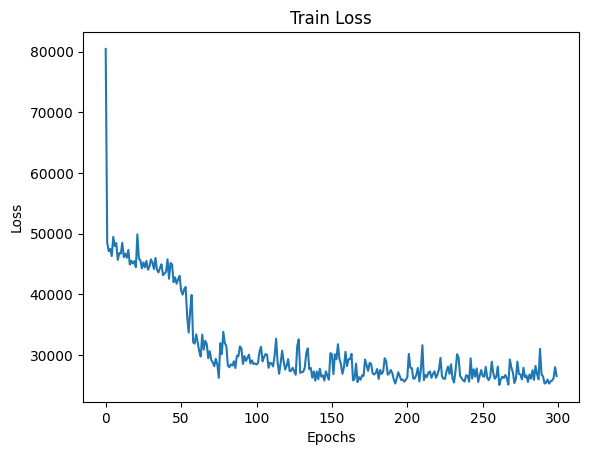

In [61]:
plt.plot(history.history['loss'])
plt.xlabel ('Epochs')
plt.ylabel('Loss')
plt.title ('Train Loss')
plt.show()

In [62]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

model.save("HousePrice.h5")


25399.927734375
